In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

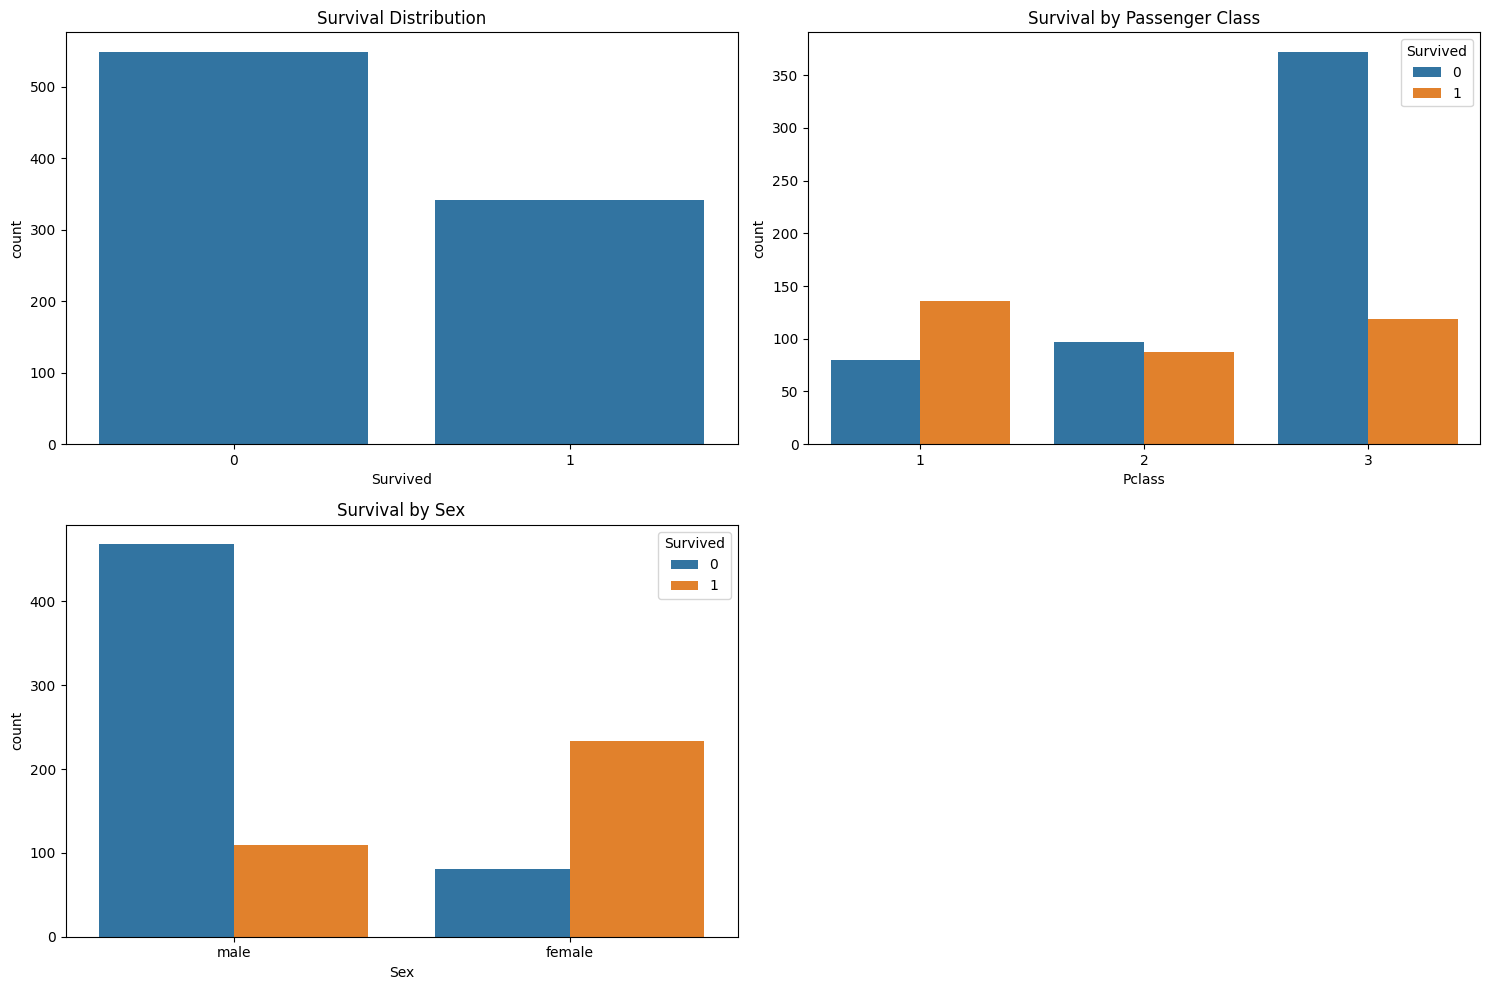

<ipython-input-5-997b41c27a5f>:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], label="Survived", shade=True)
<ipython-input-5-997b41c27a5f>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], label="Not Survived", shade=True)


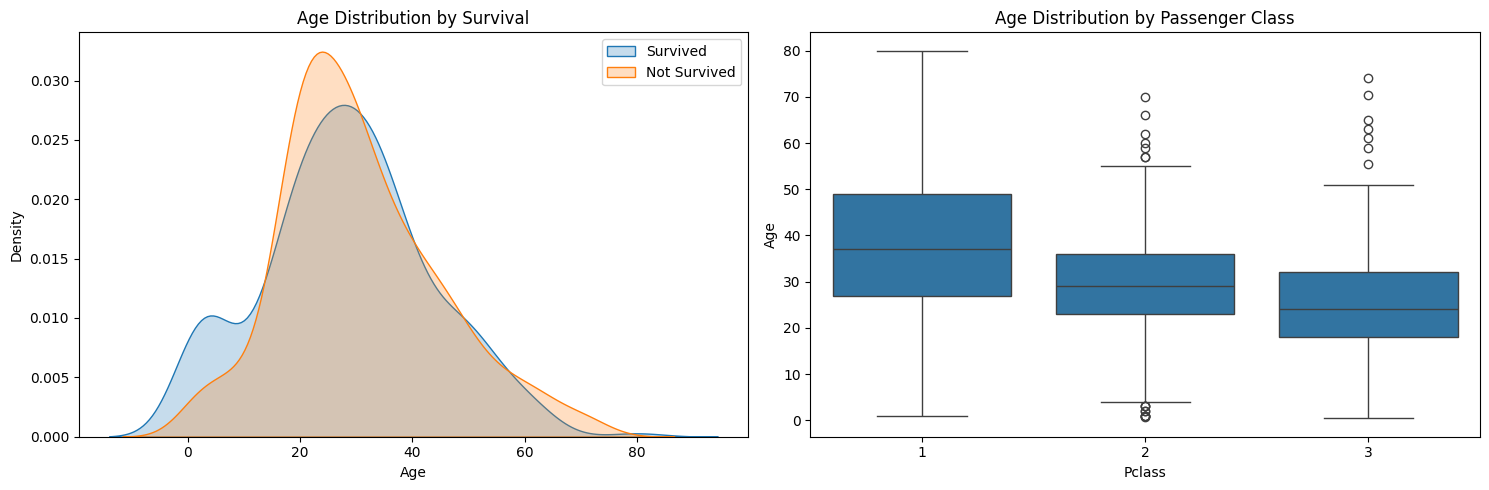

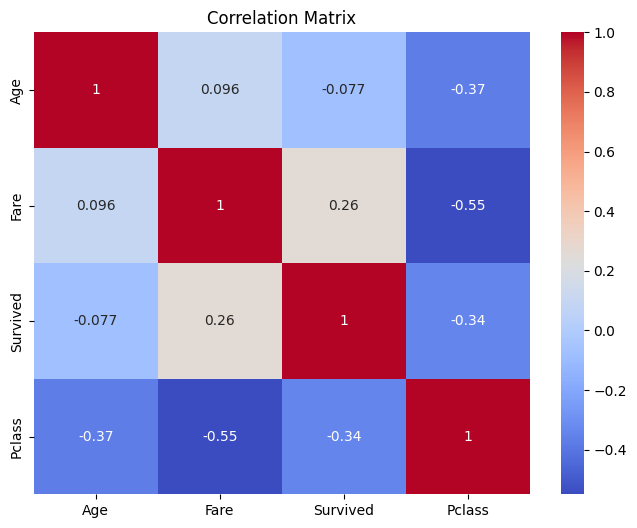

In [ ]:
plt.figure(figsize=(15, 10))

# Penyebaran data yang selamat
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Survived')
plt.title('Survival Distribution')

# Data yang selamat berdasarkan Pclass
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')

# Data yang selamat berdasarkan Sex
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# Penyebaran data usia yang selamat
plt.subplot(1, 2, 1)
sns.kdeplot(df[df['Survived'] == 1]['Age'], label="Survived", shade=True)
sns.kdeplot(df[df['Survived'] == 0]['Age'], label="Not Survived", shade=True)
plt.title('Age Distribution by Survival')
plt.legend()

# Box plot antara umur dan Pclass
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title('Age Distribution by Passenger Class')

plt.tight_layout()
plt.show()

# Correlation matrix dari featured yang ada
numerical_features = df[['Age', 'Fare', 'Survived', 'Pclass']]
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Disini correlation matrix tidak terdapat Sex karena masih kategori male dan female belum numerik

In [6]:
print("Key Insights from EDA:")
print("\n1. Survival Patterns:")
print(f"- Overall survival rate: {df['Survived'].mean():.2%}")
print(f"- Female survival rate: {df[df['Sex']=='female']['Survived'].mean():.2%}")
print(f"- Male survival rate: {df[df['Sex']=='male']['Survived'].mean():.2%}")

print("\n2. Class Distribution:")
for pclass in [1, 2, 3]:
    survival_rate = df[df['Pclass']==pclass]['Survived'].mean()
    print(f"- Class {pclass} survival rate: {survival_rate:.2%}")

print("\n3. Age Insights:")
print(f"- Median age: {df['Age'].median():.1f}")
print(f"- Missing age values: {df['Age'].isnull().sum()} ({df['Age'].isnull().mean():.2%})")

#Berdasarkan hasil Exploratory Data Analysis (EDA), kita dapat mengidentifikasi beberapa pola penting dalam kelangsungan hidup penumpang.

#Pertama, tingkat kelangsungan hidup secara keseluruhan adalah 38.38%. Ini menunjukkan bahwa sebagian besar penumpang tidak selamat dalam kejadian tersebut.
#Ketika dianalisis berdasarkan jenis kelamin, terlihat bahwa perempuan memiliki tingkat kelangsungan hidup yang jauh lebih tinggi dibandingkan laki-laki,
#dengan angka mencapai 74.20% untuk perempuan dan hanya 18.89% untuk laki-laki

#Selain jenis kelamin, kelas tempat penumpang berada juga berpengaruh terhadap peluang bertahan hidup. Penumpang kelas satu memiliki tingkat kelangsungan
#hidup tertinggi, yaitu 62.96%, diikuti oleh kelas dua dengan 47.28%, sedangkan penumpang kelas tiga memiliki peluang selamat paling rendah, hanya 24.24%.
#Perbedaan ini mengindikasikan bahwa akses terhadap fasilitas penyelamatan mungkin lebih baik untuk penumpang kelas atas dibandingkan mereka yang berada
#di kelas bawah.

#Dari sisi usia, median umur penumpang adalah 28 tahun, yang menunjukkan bahwa mayoritas penumpang berada dalam rentang usia muda hingga dewasa awal.
#Namun, terdapat sekitar 19.87% data usia yang hilang. Kehilangan data dalam jumlah yang cukup besar ini perlu diperhatikan sebelum melanjutkan
#analisis lebih lanjut, karena usia dapat menjadi faktor yang memengaruhi kemungkinan bertahan hidup. Salah satu cara yang dapat dilakukan adalah
#mengisi nilai yang hilang dengan median usia berdasarkan kelas atau jenis kelamin agar lebih akurat.

Key Insights from EDA:

1. Survival Patterns:
- Overall survival rate: 38.38%
- Female survival rate: 74.20%
- Male survival rate: 18.89%

2. Class Distribution:
- Class 1 survival rate: 62.96%
- Class 2 survival rate: 47.28%
- Class 3 survival rate: 24.24%

3. Age Insights:
- Median age: 28.0
- Missing age values: 177 (19.87%)


In [7]:
# Mengisi nilai kosong di Age dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Menghapus kolom Cabin karena terlalu banyak missing values
df.drop(columns=['Cabin'], inplace=True)

# Mengisi Embarked dengan mode (nilai yang paling sering muncul)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-7-557424bd63b9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-7-557424bd63b9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, embarked_dummies], axis=1)


print("\nEncoded features preview:")
print(df[['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())
#Saya menggunakan label encoding pada kolom Sex karena hanya terdapat male dan female sehingga cukup menggunakan label encoding
#saya menggunakan one-hot encoding karena terdapat lebih dari 2 bagian yaitu C, Q, S dan bisa di representasikan dengan True atau False


Encoded features preview:
   Sex  Embarked_C  Embarked_Q  Embarked_S
0    0       False       False        True
1    1        True       False       False
2    1       False       False        True
3    1       False       False        True
4    0       False       False        True


In [ ]:
scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

if 'Embarked' in df.columns:
    df = df.drop('Embarked', axis=1)

print("\nFinal processed dataset preview:")
print(df.head())

print("\nFinal columns in processed dataset:")
print(df.columns.tolist())

# Saya memilih untuk menggunakan standardisasi karena hasil EDA menunjukkan bahwa distribusi usia (Age) sudah mendekati distribusi normal.
# Selain itu, terdapat outlier pada data Fare yang tidak ingin saya ubah atau kompres. Banyak algoritma machine learning, seperti SVM, 
# regresi linier, dan jaringan saraf, yang lebih efektif jika menggunakan fitur yang sudah distandardisasi,
# dibandingkan dengan menggunakan normalisasi.


Final processed dataset preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False       False        True  
1      0          PC 17599  0.786845        True       False       False  
2      0  STON/O2. 3101282 -0.488854       False       